In [2]:
import torch
import torchvision
from torch import nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from helper_functions import set_seeds, plot_loss_curves
from going_modular.going_modular import engine
from going_modular.going_modular.predictions import pred_and_plot_image
import os
from torchinfo import summary


In [3]:
# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
# Define paths
train_dir = '/Users/sandundesilva/Documents/4th year/machine vision/cw final/backend/dataset/train'
test_dir = '/Users/sandundesilva/Documents/4th year/machine vision/cw final/backend/dataset/test'
model_save_path = "pretrained_vit_model_final.pth"

In [5]:
# Set seeds
set_seeds()

In [6]:
# Create data loaders
def create_dataloaders(train_dir, test_dir, transform, batch_size, num_workers=os.cpu_count()):
    train_data = datasets.ImageFolder(train_dir, transform=transform)
    test_data = datasets.ImageFolder(test_dir, transform=transform)

    class_names = train_data.classes

    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
    test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)

    return train_loader, test_loader, class_names

In [7]:
# Train the model
def train_model(model, train_loader, test_loader, optimizer, loss_fn, epochs):
    results = engine.train(model=model, train_dataloader=train_loader, test_dataloader=test_loader,
                           optimizer=optimizer, loss_fn=loss_fn, epochs=epochs, device=device)
    return results

In [8]:
# Predict and plot images
def predict_and_plot(model, image_path, class_names):
    pred_and_plot_image(model=model, image_path=image_path, class_names=class_names)

In [9]:
# Pretrained weights for ViT-Base
vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT 

In [10]:
# Setup a ViT model instance with pretrained weights
pretrained_vit = torchvision.models.vit_b_16(weights=vit_weights).to(device)

In [11]:
# Freeze the base parameters
for parameter in pretrained_vit.parameters():
    parameter.requires_grad = False

In [12]:
# Change the classifier head
class_names = ['paper', 'rock', 'scissor']
pretrained_vit.heads = nn.Linear(in_features=768, out_features=len(class_names)).to(device)

In [13]:
# Define optimizer and loss function
optimizer = torch.optim.Adam(params=pretrained_vit.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

In [14]:
# Create transforms
pretrained_vit_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

In [15]:
from torchinfo import summary

# Print a summary using torchinfo (uncomment for actual output)
summary(model=pretrained_vit, 
        input_size=(32, 3, 224, 224), # (batch_size, color_channels, height, width)
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [32, 3, 224, 224]    [32, 3]              768                  Partial
├─Conv2d (conv_proj)                                         [32, 3, 224, 224]    [32, 768, 14, 14]    (590,592)            False
├─Encoder (encoder)                                          [32, 197, 768]       [32, 197, 768]       151,296              False
│    └─Dropout (dropout)                                     [32, 197, 768]       [32, 197, 768]       --                   --
│    └─Sequential (layers)                                   [32, 197, 768]       [32, 197, 768]       --                   False
│    │    └─EncoderBlock (encoder_layer_0)                   [32, 197, 768]       [32, 197, 768]       (7,087,872)          False
│    │    └─EncoderBlock (encoder_layer_1)                   [32, 197, 768]       [32, 

In [16]:
# Setup dataloaders
train_loader, test_loader, class_names = create_dataloaders(train_dir, test_dir, pretrained_vit_transforms, batch_size=32)

In [15]:
pretrained_vit_results = train_model(pretrained_vit, train_loader, test_loader, optimizer, loss_fn, epochs=10)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.4211 | train_acc: 0.8283 | test_loss: 0.2247 | test_acc: 0.9432
Epoch: 2 | train_loss: 0.2768 | train_acc: 0.8712 | test_loss: 0.1829 | test_acc: 0.9403
Epoch: 3 | train_loss: 0.2412 | train_acc: 0.8933 | test_loss: 0.1581 | test_acc: 0.9347
Epoch: 4 | train_loss: 0.2182 | train_acc: 0.9065 | test_loss: 0.1517 | test_acc: 0.9403
Epoch: 5 | train_loss: 0.2021 | train_acc: 0.9151 | test_loss: 0.1430 | test_acc: 0.9375
Epoch: 6 | train_loss: 0.1875 | train_acc: 0.9276 | test_loss: 0.1420 | test_acc: 0.9432


Python(4747) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(4748) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(4749) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(4750) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(4751) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(4752) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(4753) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(4754) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Epoch: 7 | train_loss: 0.1756 | train_acc: 0.9299 | test_loss: 0.1442 | test_acc: 0.9432


Python(4782) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(4783) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(4784) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(4785) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(4786) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(4787) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(4788) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(4789) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(4898) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(4899) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(4900) MallocStackLoggin

Epoch: 8 | train_loss: 0.1676 | train_acc: 0.9345 | test_loss: 0.1410 | test_acc: 0.9375


Python(4947) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(4948) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(4950) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(4951) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(4952) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(4953) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(4954) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(4955) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(5263) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(5264) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(5265) MallocStackLoggin

Epoch: 9 | train_loss: 0.1594 | train_acc: 0.9390 | test_loss: 0.1463 | test_acc: 0.9403


Python(5286) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(5287) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(5288) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(5289) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(5291) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(5292) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(5293) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(5294) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(5340) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(5341) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(5342) MallocStackLoggin

Epoch: 10 | train_loss: 0.1510 | train_acc: 0.9431 | test_loss: 0.1408 | test_acc: 0.9403


In [17]:
pretrained_vit_results = train_model(pretrained_vit, train_loader, test_loader, optimizer, loss_fn, epochs=10)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.4092 | train_acc: 0.8321 | test_loss: 0.2203 | test_acc: 0.9403
Epoch: 2 | train_loss: 0.2721 | train_acc: 0.8753 | test_loss: 0.1742 | test_acc: 0.9403
Epoch: 3 | train_loss: 0.2384 | train_acc: 0.8928 | test_loss: 0.1554 | test_acc: 0.9375
Epoch: 4 | train_loss: 0.2152 | train_acc: 0.9106 | test_loss: 0.1447 | test_acc: 0.9517
Epoch: 5 | train_loss: 0.1979 | train_acc: 0.9192 | test_loss: 0.1527 | test_acc: 0.9432
Epoch: 6 | train_loss: 0.1845 | train_acc: 0.9281 | test_loss: 0.1429 | test_acc: 0.9489
Epoch: 7 | train_loss: 0.1760 | train_acc: 0.9334 | test_loss: 0.1458 | test_acc: 0.9432
Epoch: 8 | train_loss: 0.1663 | train_acc: 0.9345 | test_loss: 0.1375 | test_acc: 0.9432
Epoch: 9 | train_loss: 0.1583 | train_acc: 0.9385 | test_loss: 0.1417 | test_acc: 0.9432
Epoch: 10 | train_loss: 0.1543 | train_acc: 0.9385 | test_loss: 0.1387 | test_acc: 0.9375


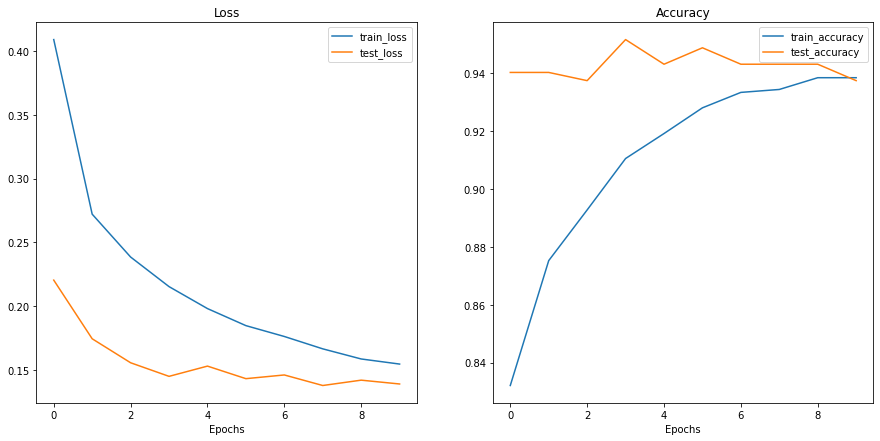

In [18]:
plot_loss_curves(pretrained_vit_results)

Class: paper
Precision: 0.923728813559322
Recall: 0.956140350877193
F1 Score: 0.939655172413793

Class: rock
Precision: 0.9067796610169492
Recall: 0.9385964912280702
F1 Score: 0.9224137931034483

Class: scissor
Precision: 0.9809523809523809
Recall: 0.911504424778761
F1 Score: 0.944954128440367



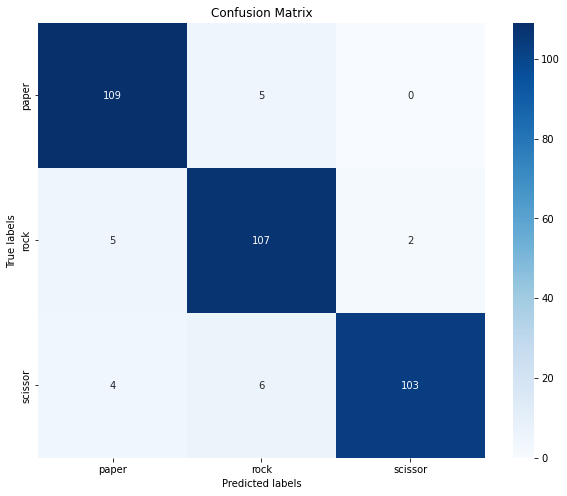

In [19]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_metrics(model, test_dataloader, device):
    model.eval()
    y_true = []
    y_pred = []
    
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average=None)
    cm = confusion_matrix(y_true, y_pred)
    return precision, recall, f1, cm

precision, recall, f1, confusion_matrix = calculate_metrics(pretrained_vit, test_loader, device)

for i, class_name in enumerate(class_names):
    print(f"Class: {class_name}")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1[i]}")
    print()

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [22]:
import pandas as pd

def create_correctness_table_from_confusion_matrix(confusion_matrix):
    TN = confusion_matrix[0][0]
    FP = sum(confusion_matrix[0][1:])
    FN = sum(confusion_matrix[i][0] for i in range(1, len(confusion_matrix)))
    TP = sum(sum(confusion_matrix[i][1:]) for i in range(1, len(confusion_matrix)))

    correctness_table = pd.DataFrame({
        '': ['Predicted Incorrect', 'Predicted Correct'],
        'Actual Incorrect': [TN, FP],
        'Actual Correct': [FN, TP]
    })

    return correctness_table

confusion_matrix = [[109, 5, 0],
                    [5,107, 2],
                    [4, 6, 103],]

correctness_table = create_correctness_table_from_confusion_matrix(confusion_matrix)

print(correctness_table)


                        Actual Incorrect  Actual Correct
0  Predicted Incorrect               109               9
1    Predicted Correct                 5             218


In [18]:
torch.save(pretrained_vit, model_save_path)

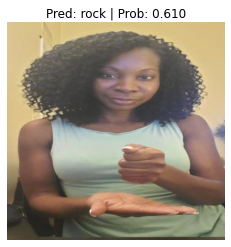

In [1]:
import requests
import torch
from going_modular.going_modular.predictions import pred_and_plot_image

class_names = ['paper', 'rock', 'scissor']

saved_model_path = "/Users/sandundesilva/Documents/4th year/machine vision/cw final/backend/pretrainedModel/pretrained_vit_model_final.pth"
pretrained_vit = torch.load(saved_model_path)

custom_image_path = "/Users/sandundesilva/Documents/4th year/machine vision/cw final/backend/dataset/test/rock/20220216_223200_jpg.rf.e3370ed162c0a328e8909821ad1f02dd.jpg"

pred_and_plot_image(model=pretrained_vit,
                    image_path=custom_image_path,
                    class_names=class_names)
